# Connect to G-Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
folder_dir = '/content/drive/MyDrive/DS_PROJECT_PORTFOLIO/DS_PROJECT2_DATAVISUALIZATION'
os.chdir(folder_dir)

In [3]:
!ls

'Salinan [Cleaned]Laptop_Price.csv'  '[Sandbox] DS Project 2.1 - DataVisualization.ipynb'


# Import Libraries

In [4]:
# Dataframe manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Import Dataframe

In [5]:
df = pd.read_csv('Salinan [Cleaned]Laptop_Price.csv')
df.head()

,laptop_id,company,product,typename,inches,ram(GB),opsys,weight(kg),price_euros,touchscreen,resolution,cpu_speed(GHz),cpu_brand,gpu_brand,memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,8.0,macOS,1.37,1339.69,0,2560x1600,2.3,Intel,Intel,128.0,SSD,0.0,NaN
1,2,Apple,Macbook Air,Ultrabook,13.3,8.0,macOS,1.34,898.94,0,1440x900,1.8,Intel,Intel,128.0,FlashStorage,0.0,NaN
2,3,HP,250 G6,Notebook,15.6,8.0,Windows 10,1.86,575.00,0,1920x1080,2.5,Intel,Intel,256.0,SSD,0.0,NaN
3,4,Apple,MacBook Pro,Ultrabook,15.4,16.0,macOS,1.83,2537.45,0,2880x1800,2.7,Intel,AMD,512.0,SSD,0.0,NaN
4,5,Apple,MacBook Pro,Ultrabook,13.3,8.0,macOS,1.37,1803.60,0,2560x1600,3.1,Intel,Intel,256.0,SSD,0.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_id         1302 non-null   int64  
 1   company           1302 non-null   object 
 2   product           1302 non-null   object 
 3   typename          1302 non-null   object 
 4   inches            1302 non-null   float64
 5   ram(GB)           1302 non-null   float64
 6   opsys             1302 non-null   object 
 7   weight(kg)        1302 non-null   float64
 8   price_euros       1302 non-null   float64
 9   touchscreen       1302 non-null   int64  
 10  resolution        1302 non-null   object 
 11  cpu_speed(GHz)    1302 non-null   float64
 12  cpu_brand         1302 non-null   object 
 13  gpu_brand         1302 non-null   object 
 14  memory_1_sto(GB)  1302 non-null   float64
 15  memory_1_type     1302 non-null   object 
 16  memory_2_sto(GB)  1302 non-null   float64


# Data Visualization

In [7]:
# Using This to Visualize BarPlot
def PlotBarPlot(mydf, theTitle, theXlabel, theYlabel):
  """
    Create Barplot using sns libraries.

    Args:
        mydf (any): dataframe[input your columns]
        theTitle (str): Input Title name
        theXlabel (str): Input Xlabel name
        theYlabel (str): Input Ylabel name

    Returns:
        Barplot
  """
  fig, ax = plt.subplots(figsize=(13,6))
  ax = (
      sns.barplot(x= mydf.value_counts().index, y= mydf.value_counts(), palette='mako_r'),
      ax.bar_label(ax.containers[0], color='black'),
      ax.set(title=theTitle, xlabel= theXlabel, ylabel=theYlabel),
      plt.xticks(rotation=45)
  )

In [8]:
def BoxPlotHistPlot(dfi, columnsi, thetitle, satuan):
    """
      Create Boxplot and Histplot using this function

      Args:
          dfi(DataFrame): input your dataframe in here.
          columnsii(str): input your dataframe name.
          thetitle(str): input string for plot name.
          satuan(str): input string for satuan

      Returns:
          Boxplot and Histplot
    """
    fig, ax = plt.subplots(figsize=(10,6), nrows=2, ncols=1, gridspec_kw={"height_ratios": (.2, .8)})
    ax= (
        ax[0].set(title=thetitle),
        sns.boxplot(x=dfi[columnsi], ax=ax[0]),
        plt.axvline(dfi[columnsi].mean(), linewidth=3, color='r', linestyle='-', label='Mean: ' + str(np.round(dfi[columnsi].mean(),1)) + satuan),
        plt.axvline(dfi[columnsi].median(), linewidth=3, color='g', linestyle='-', label='Median: ' + str(np.round(dfi[columnsi].median(),1)) + satuan),
        plt.axvline(dfi[columnsi].mode()[0], linewidth=3, color='b', linestyle='-', label='Mode: ' + str(dfi[columnsi].mode()[0]) + satuan),
        plt.legend(),
        plt.tight_layout(),
        sns.histplot(dfi[columnsi], ax=ax[1])
    )

## Which brand is the most frequent in the dataframe?

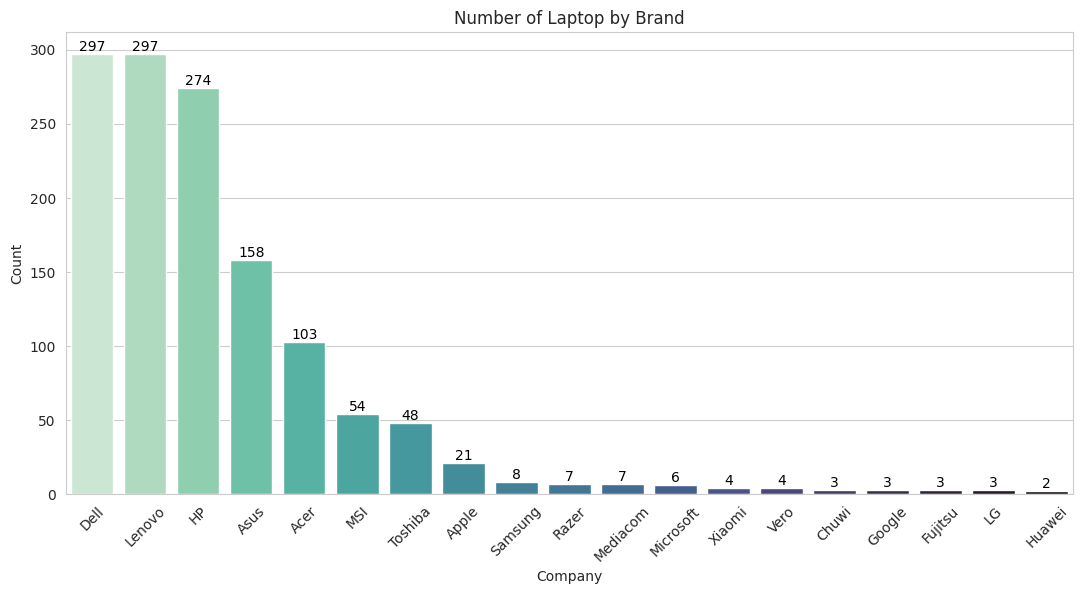

In [9]:
PlotBarPlot(df['company'], 'Number of Laptop by Brand', 'Company', 'Count')

## What type of laptop is the most frequent?

In [10]:
df['typename'].value_counts(dropna=False)

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: typename, dtype: int64

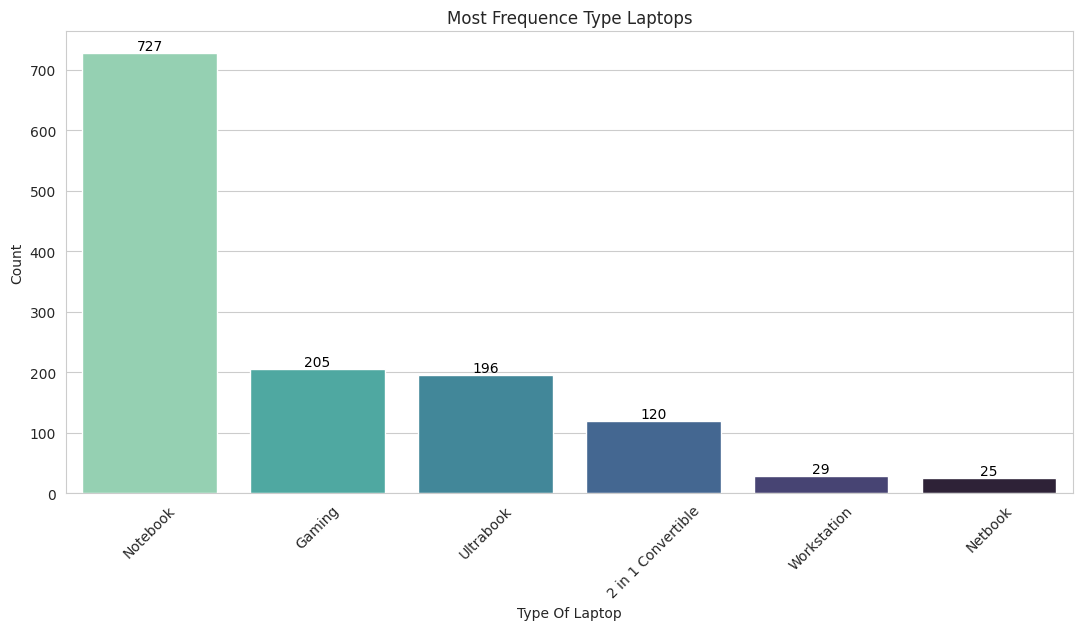

In [11]:
PlotBarPlot(df['typename'], 'Most Frequence Type Laptops', 'Type Of Laptop', 'Count')

## Which size is the most popular?

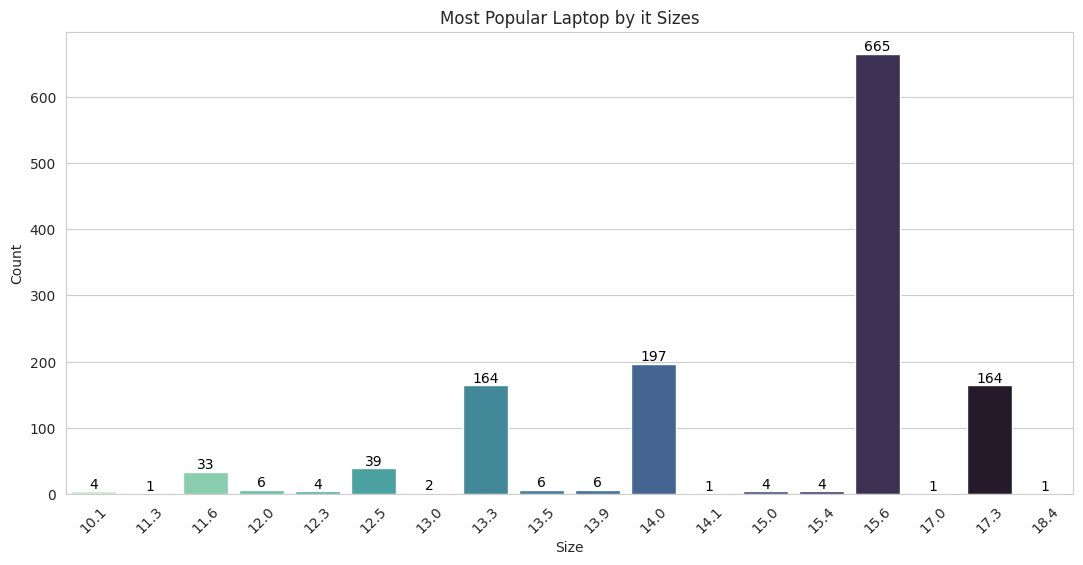

In [12]:
PlotBarPlot(df['inches'], 'Most Popular Laptop by it Sizes', 'Size', 'Count')

### TOP 5 Popular Laptop by sizes

In [13]:
df_groupby = pd.DataFrame(df.groupby(df['inches'], as_index=False)['inches'].value_counts())
df_sort_values = df_groupby.sort_values('count', ascending=False).head()

In [14]:
df_sort_values

,inches,count
14,15.6,665
10,14.0,197
16,17.3,164
7,13.3,164
5,12.5,39


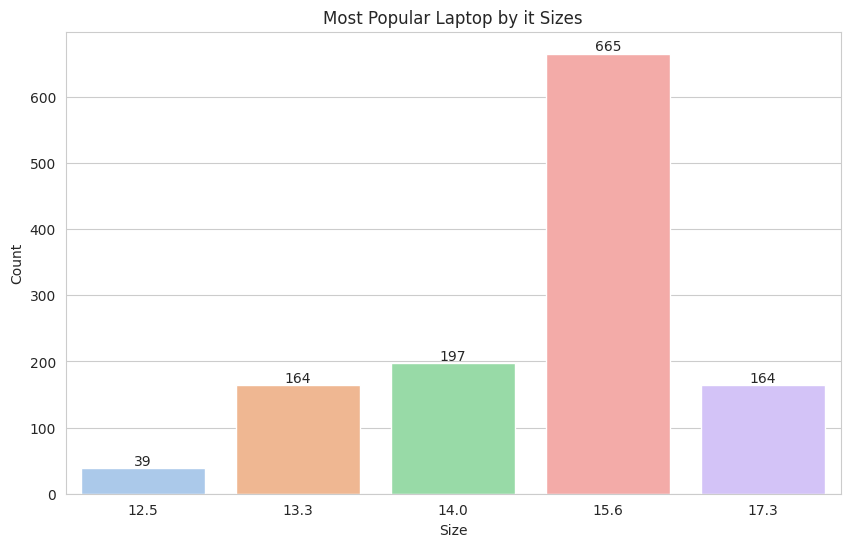

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
ax= (
    sns.barplot(x= df_sort_values['inches'], y= df_sort_values['count'], palette='pastel'),
    ax.bar_label(ax.containers[0]),
    ax.set(title= 'Most Popular Laptop by it Sizes', xlabel='Size', ylabel='Count')
)

## How is weight distributed among the laptops?

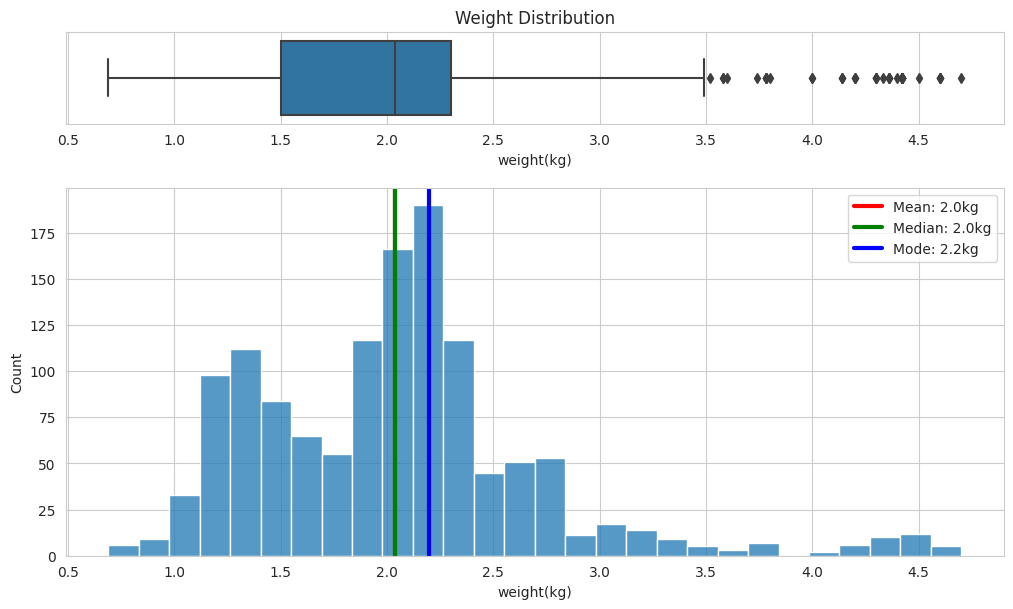

In [16]:
BoxPlotHistPlot(df, 'weight(kg)', 'Weight Distribution', 'kg')

## How is price distributed among the laptops?

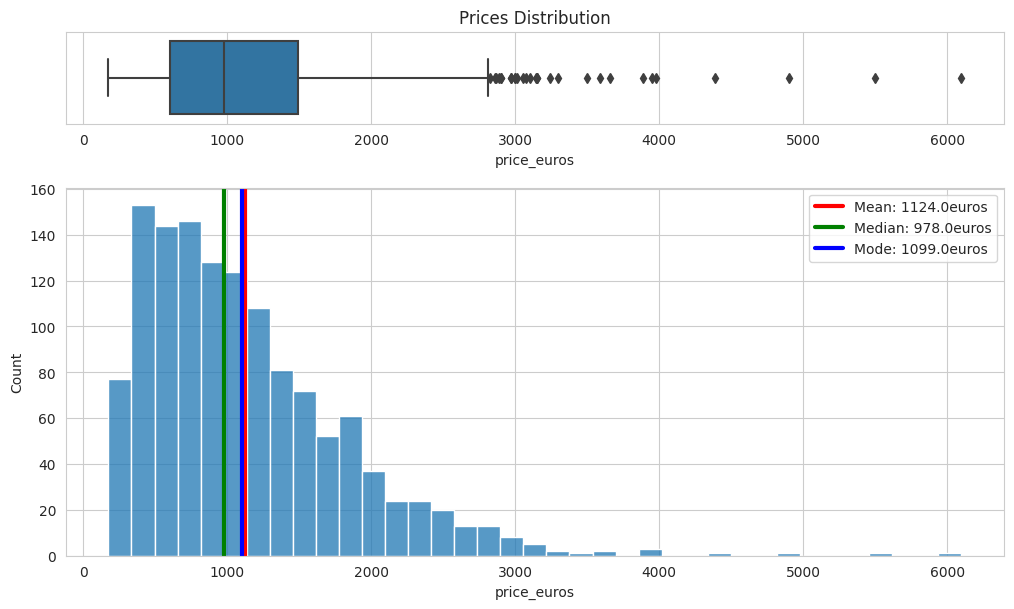

In [17]:
BoxPlotHistPlot(df, 'price_euros', 'Prices Distribution', 'euros')

## How is RAM distributed among the laptops?

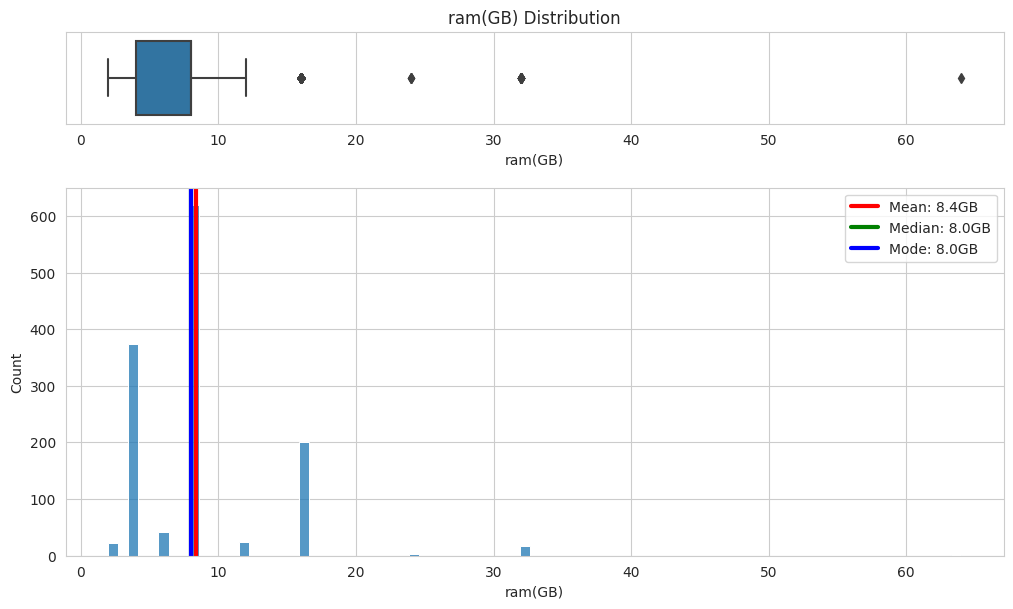

In [18]:
BoxPlotHistPlot(df, 'ram(GB)', 'ram(GB) Distribution', 'GB')

## How is CPU frequency distributed among the laptops?

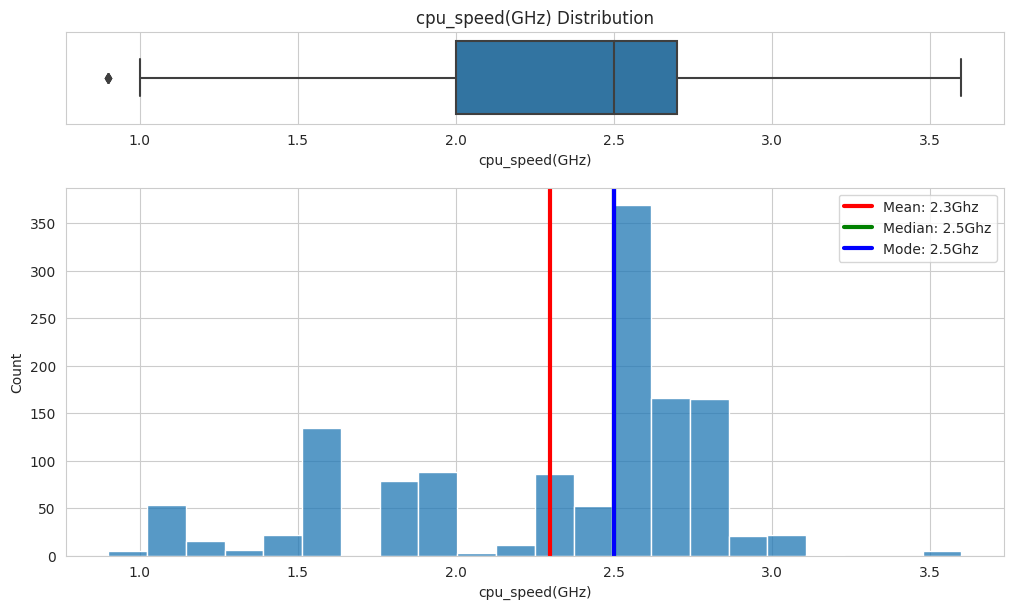

In [19]:
BoxPlotHistPlot(df, 'cpu_speed(GHz)', 'cpu_speed(GHz) Distribution', 'Ghz')

## How is Hard Drive capacity distributed among the laptops?

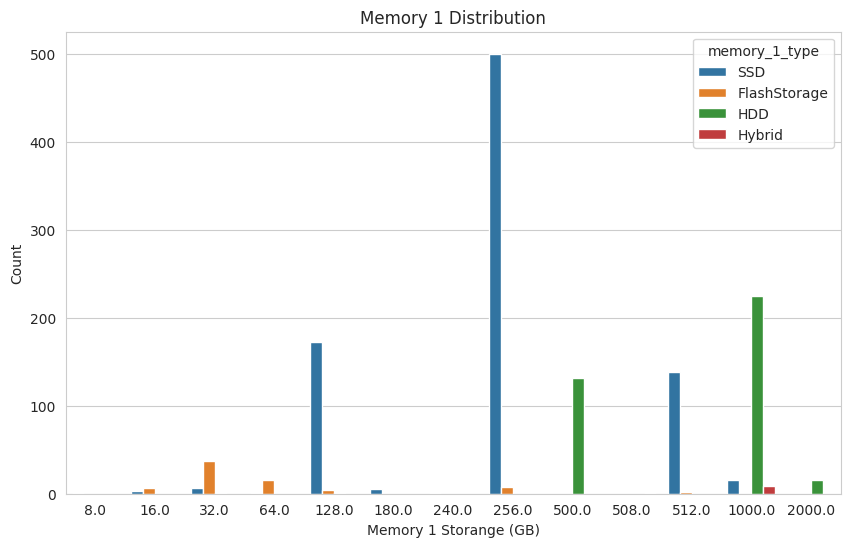

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
ax= (
    sns.countplot(x= df['memory_1_sto(GB)'], hue= df['memory_1_type']),
    ax.set(title='Memory 1 Distribution', xlabel='Memory 1 Storange (GB)', ylabel='Count'),
    plt.xticks(rotation=0)
)

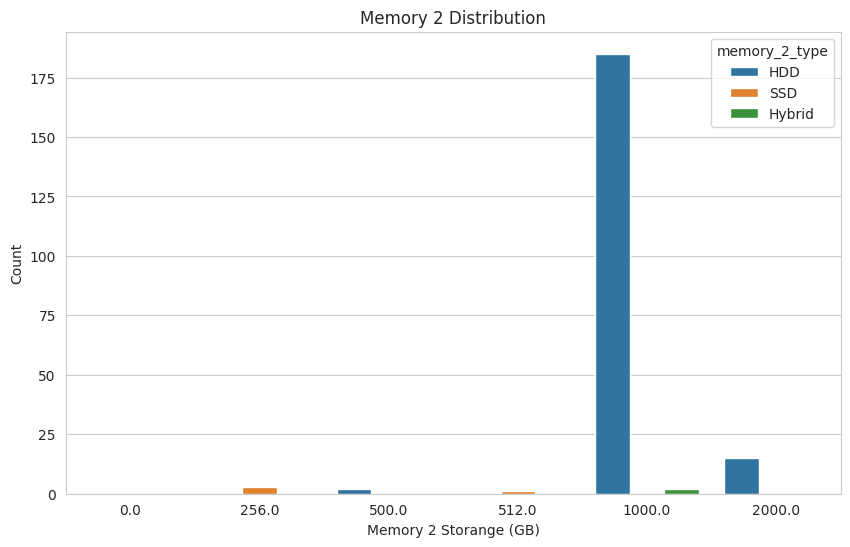

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
ax= (
    sns.countplot(x= df['memory_2_sto(GB)'], hue= df['memory_2_type']),
    ax.set(title='Memory 2 Distribution', xlabel='Memory 2 Storange (GB)', ylabel='Count'),
    plt.xticks(rotation=0)
)

## Price VS CPU brand by GPU brand

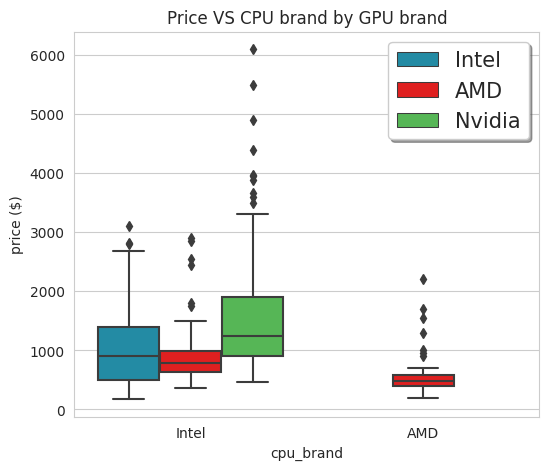

In [72]:
cpu_palette = {'Intel':'#0d98ba', 'AMD':'#FF0000', 'Nvidia':'#46C646'}
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(x='cpu_brand', y='price_euros', data=df, hue='gpu_brand', palette=cpu_palette)
ax.set_title('Price vs CPU brand by GPU brand')
plt.ylabel('price ($)')
plt.legend(loc='upper right', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.title('Price VS CPU brand by GPU brand')
plt.show()

## What is the average price of laptops by company?

In [73]:
df_groupby = df.groupby(by=['company'], as_index=False)['price_euros'].mean()
df_sort_values = df_groupby.sort_values('price_euros', ascending=False)

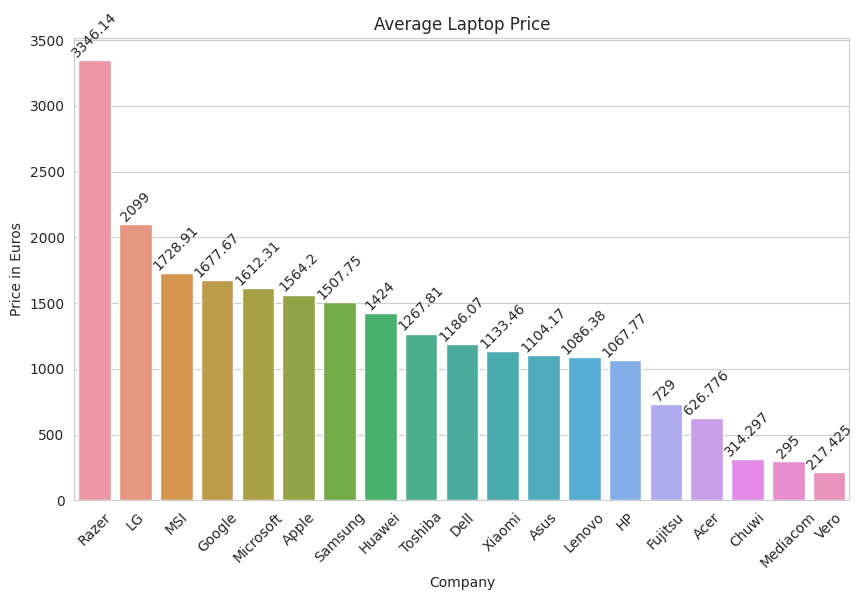

In [74]:
fig, ax= plt.subplots(figsize=(10,6))
ax= (
    sns.barplot(x= df_sort_values['company'], y= df_sort_values['price_euros']),
    ax.set(title='Average Laptop Price', xlabel='Company', ylabel='Price in Euros'),
    ax.bar_label(ax.containers[0], rotation=45),
    plt.xticks(rotation=45)
)